# Active Transport and Air Quality Impact

**Authored by**:  Ngoc Bao Son Nguyen

**Duration**: 90 mins

**Level**: Intermediate

**Pre-requisite Skills**: Python, Pandas, Matplotlib, Seaborn


### Scenario

As a policy adviser for sustainable urban development, I want to uncover clear trends showing how increased walking and cycling activity align with lower air pollutant levels (e.g., PM2.5, PM10). The aim's to back data-driven decisions for expanding active transport infrastructure.

As a policy adviser working on clean air initiatives, I want to compare annual and seasonal variations in active transport use with changes in air quality, so I can evaluate the environmental impact of transport policies and propose further emission-reduction strategies.

As a policy adviser guiding city planning teams, I want to visualise and communicate the positive correlation between active mobility and improved air quality, so that I can influence future transport and health policy frameworks that promote walking and cycling in Melbourne.

### What this use case will teach you

At the end of this use case, you will demonstrate:

- Collected, converted datasets from different formats, and merged multiple open datasets (e.g., pedestrian counts, bike usage, and air quality).

- Preprocessed and transformed raw data to ensure robust, reliable time-series analysis.

- Conducted visual and statistical exploratory data analysis (EDA) to investigate correlations and seasonal trends between active transport and pollutant levels.

- Applied advanced machine learning and statistical methods to predict the impact of the increasing walking and cycling activity on air quality.

### Background and Introduction

With concerns about climate change, urban pollution, and sustainable development growing, cities around the world are turning to active transport-cycling and walking-as a core way to cut emissions and boost public health. In Melbourne, efforts to broaden cycling networks and create more pedestrian-friendly zones fit with the city's broader goals: cleaner air and a shift toward low-carbon living.

Meanwhile, easy access to timely, location-specific data lets us measure how these active-transport efforts relate to environmental outcomes. Understanding whether more people on bikes and on foot actually improves air quality can help inform evidence-based policymaking, smarter infrastructure investments, and more engaged communities.

This use case looks at how active transport activity and air-pollution trends in Melbourne relate, using a series of interactive data visualisations and statistical analyses. By pairing datasets on pedestrian and bicycle counts with air-quality indicators-PM10, BPM2.5, and SBPM25-from 2019 to 2024, the analysis serves two main user groups:

- Urban planners and environmental policy advisers can assess whether promoting active transport correlates with reductions in particulate pollution and use these insights to shape future investments and public-health strategies.
- Researchers and sustainability advocates can explore seasonal and longitudinal trends in active mobility and pollution, identifying key periods or interventions that may have produced measurable impacts.

By integrating active-transport and air-quality datasets, this tool offers a holistic view of how changes in urban mobility behavior might influence environmental health, supporting smarter, greener city development across Melbourne.

### Datasets used
- [Bicycle volume](https://opendata.transport.vic.gov.au/dataset/bicycle-volume-and-speed/resource/cca05f99-edf9-4226-8fb2-f2bde639c40f?inner_span=True) <br>
This dataset tracks hourly counts and speeds of bicycles detected at counting stations across Victoria-including the City of Melbourne. It sheds light on cycling activity patterns over time and across locations.

- [Air Quality](https://discover.data.vic.gov.au/dataset/epa-air-watch-all-sites-air-quality-hourly-averages-yearly/historical)<br>
This dataset provides hourly averages of key air pollutants-PM10, BPM2.5, SBPM25, and more-collected from monitoring stations across Victoria. It lets you track air quality over time and across different sites.

- [Pedestrian Count](https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/?sort=sensing_date) <br>
This dataset tracks hourly pedestrian activity from sensor locations across the City of Melbourne. It offers detailed counts by time, date, and location, so you can spot walking patterns and foot traffic trends.

- [Bicycle Network](https://data.melbourne.vic.gov.au/explore/dataset/bicycle-network/information/) <br>
This spatial dataset maps the official bicycle network within the City of Melbourne, including on-road bike lanes, off-road paths, and shared zones. It supports spatial analysis of infrastructure availability and cycling accessibility.

- [Pedestrian Network](https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-network/information/) <br>
This dataset illustrates the designated pedestrian pathways and walkways within Melbourne. It provides geographic context for foot traffic patterns and supports urban mobility planning.


### Importing Packages

This section imports essential libraries to be used for analyse the use case

In [1]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io
import os
import shutil
import gc

### Importing Datasets

This section loads all external datasets used in the analysis, including pedestrian counts, bicycle volumes, air quality measurements, and network infrastructure data. It also handles importing data via APIs, converting zip files and xlsx files to dataframe where applicable, ensuring each dataset is structured and ready for cleaning, merging, and further exploration.

In [2]:
def process_one_zip(zip_name, zip_dir, extract_dir='/content/unzipped_temp'):
    outer_zip_path = os.path.join(zip_dir, zip_name)

    if os.path.exists(extract_dir):
        shutil.rmtree(extract_dir)
    os.makedirs(extract_dir, exist_ok=True)

    try:
        with zipfile.ZipFile(outer_zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f" Extracted outer ZIP: {zip_name}")
    except zipfile.BadZipFile:
        print(f" Bad ZIP file: {zip_name}")
        return None

    for root, dirs, files in os.walk(extract_dir):
        for file in files:
            if file.lower().endswith(".zip"):
                inner_zip_path = os.path.join(root, file)
                inner_extract_path = os.path.join(root, os.path.splitext(file)[0])
                os.makedirs(inner_extract_path, exist_ok=True)
                try:
                    with zipfile.ZipFile(inner_zip_path, 'r') as zip_ref:
                        zip_ref.extractall(inner_extract_path)
                except zipfile.BadZipFile:
                    print(f" Skipping corrupted ZIP: {inner_zip_path}")

    zip_df_list = []
    for root, dirs, files in os.walk(extract_dir):
        for file in files:
            if file.lower().endswith(".csv"):
                csv_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(csv_path)
                    df['source_file'] = file
                    zip_df_list.append(df)
                except Exception as e:
                    print(f" Failed to read {csv_path}: {e}")

    if zip_df_list:
        combined_df = pd.concat(zip_df_list, ignore_index=True)
        print(f" Combined CSVs from {zip_name} — shape: {combined_df.shape}")
        return combined_df
    else:
        print(f" No CSV files found in {zip_name}")
        return None

In [3]:
bicycle_count_2019 = process_one_zip('bicycle_volume_speed_2019.zip', zip_dir='.')
bicycle_count_2019.head()

 Extracted outer ZIP: bicycle_volume_speed_2019.zip
 Combined CSVs from bicycle_volume_speed_2019.zip — shape: (12592805, 18)


,DATA_TYPE,TIS_DATA_REQUEST,SITE_XN_ROUTE,LOC_LEG,DATE,TIME,CLASS,LANE,SPEED,WHEELBASE,HEADWAY,GAP,AXLE,AXLE_GROUPING,RHO,VEHICLE,DIRECTION,source_file
0,IND,208,32612,61171,01/12/2018,11:03:44,15,0,13.8,1.0,0.0,0.0,2,1,1.0,CYCLE,N,IND_D208_X32612.csv
1,IND,208,32612,61172,01/12/2018,11:05:58,15,1,23.7,1.0,134.5,134.6,2,1,1.0,CYCLE,S,IND_D208_X32612.csv
2,IND,208,32612,61171,01/12/2018,11:08:47,15,0,12.5,1.0,303.3,303.0,2,1,1.0,CYCLE,N,IND_D208_X32612.csv
3,IND,208,32612,61172,01/12/2018,11:09:41,15,1,27.5,1.1,222.3,222.2,2,1,1.0,CYCLE,S,IND_D208_X32612.csv
4,IND,208,32612,61172,01/12/2018,11:12:08,15,1,19.8,1.0,147.4,147.3,2,1,1.0,CYCLE,S,IND_D208_X32612.csv


In [4]:
bicycle_count_2020 = process_one_zip('bicycle_volume_speed_2020.zip', zip_dir='.')
bicycle_count_2020.head()

 Extracted outer ZIP: bicycle_volume_speed_2020.zip


C:\Users\PCs\AppData\Local\Temp\ipykernel_8824\76526138.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(zip_df_list, ignore_index=True)


 Combined CSVs from bicycle_volume_speed_2020.zip — shape: (11242966, 18)


,DATA_TYPE,TIS_DATA_REQUEST,SITE_XN_ROUTE,LOC_LEG,DATE,TIME,CLASS,LANE,SPEED,WHEELBASE,HEADWAY,GAP,AXLE,AXLE_GROUPING,RHO,VEHICLE,DIRECTION,source_file
0,IND,208,32612,61172,02/12/2019,11:39:07,15,1,17.6,1.0,1400.8,1400.8,2,1,1.0,CYCLE,S,IND_D208_X32612.csv
1,IND,208,32612,61171,02/12/2019,12:18:11,15,0,20.6,1.0,3744.2,3744.2,2,1,1.0,CYCLE,N,IND_D208_X32612.csv
2,IND,208,32612,61172,02/12/2019,12:20:25,15,1,15.8,1.0,2477.4,2477.2,2,1,1.0,CYCLE,S,IND_D208_X32612.csv
3,IND,208,32612,61172,02/12/2019,12:29:33,15,1,21.8,1.0,548.5,548.3,2,1,1.0,CYCLE,S,IND_D208_X32612.csv
4,IND,208,32612,61171,02/12/2019,13:15:34,15,0,24.4,1.0,3443.6,3443.4,2,1,1.0,CYCLE,N,IND_D208_X32612.csv


In [5]:
bicycle_count_2021 = process_one_zip('bicycle_volume_speed_2021.zip', zip_dir='.')
bicycle_count_2021.head()

 Extracted outer ZIP: bicycle_volume_speed_2021.zip


C:\Users\PCs\AppData\Local\Temp\ipykernel_8824\76526138.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(zip_df_list, ignore_index=True)


 Combined CSVs from bicycle_volume_speed_2021.zip — shape: (10759143, 18)


,DATA_TYPE,TIS_DATA_REQUEST,SITE_XN_ROUTE,LOC_LEG,DATE,TIME,CLASS,LANE,SPEED,WHEELBASE,HEADWAY,GAP,AXLE,AXLE_GROUPING,RHO,VEHICLE,DIRECTION,source_file
0,IND,208,10223,59443,28/12/2020,05:29:22,15,0,30.2,1.1,5166.7,5166.7,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20210104.csv
1,IND,208,10223,59443,28/12/2020,05:33:26,15,0,29.4,1.0,244.2,244.1,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20210104.csv
2,IND,208,10223,59444,28/12/2020,05:40:45,15,1,13.2,1.0,5849.7,5849.9,2,1,1.0,CYCLE,S,IND_D208_X10223_NS0_20210104.csv
3,IND,208,10223,59444,28/12/2020,05:42:57,15,1,14.9,1.1,131.9,131.7,2,1,1.0,CYCLE,S,IND_D208_X10223_NS0_20210104.csv
4,IND,208,10223,59443,28/12/2020,05:44:19,15,0,32.9,1.0,652.5,652.4,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20210104.csv


In [6]:
bicycle_count_2022 = process_one_zip('bicycle_volume_speed_2022.zip', zip_dir='.')
bicycle_count_2022.head()

 Extracted outer ZIP: bicycle_volume_speed_2022.zip


C:\Users\PCs\AppData\Local\Temp\ipykernel_8824\76526138.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(zip_df_list, ignore_index=True)


 Combined CSVs from bicycle_volume_speed_2022.zip — shape: (8638358, 18)


,DATA_TYPE,TIS_DATA_REQUEST,SITE_XN_ROUTE,LOC_LEG,DATE,TIME,CLASS,LANE,SPEED,WHEELBASE,HEADWAY,GAP,AXLE,AXLE_GROUPING,RHO,VEHICLE,DIRECTION,source_file
0,IND,208,10223,59444,27/12/2021,04:48:42,15,1,16.0,1.0,297.7,297.8,2,1,1.0,CYCLE,S,IND_D208_X10223_NS0_20220103.csv
1,IND,208,10223,59443,27/12/2021,05:25:27,15,0,37.4,1.0,2503.1,2503.1,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20220103.csv
2,IND,208,10223,59443,27/12/2021,05:40:44,15,0,35.6,1.0,917.4,917.3,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20220103.csv
3,IND,208,10223,59443,27/12/2021,05:40:45,15,0,36.3,1.0,0.6,0.5,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20220103.csv
4,IND,208,10223,59443,27/12/2021,05:40:47,15,0,34.9,1.0,2.0,2.0,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20220103.csv


In [7]:
bicycle_count_2023 = process_one_zip('bicycle_volume_speed_2023.zip', zip_dir='.')
bicycle_count_2023.head()

 Extracted outer ZIP: bicycle_volume_speed_2023.zip


C:\Users\PCs\AppData\Local\Temp\ipykernel_8824\76526138.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(zip_df_list, ignore_index=True)


 Combined CSVs from bicycle_volume_speed_2023.zip — shape: (10467615, 18)


,DATA_TYPE,TIS_DATA_REQUEST,SITE_XN_ROUTE,LOC_LEG,DATE,TIME,CLASS,LANE,SPEED,WHEELBASE,HEADWAY,GAP,AXLE,AXLE_GROUPING,RHO,VEHICLE,DIRECTION,source_file
0,IND,208,10223,59443,26/12/2022,04:58:18,15,0,17.3,1.1,44.7,44.7,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20230102.csv
1,IND,208,10223,59443,26/12/2022,05:42:26,15,0,26.9,1.0,2648.2,2648.0,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20230102.csv
2,IND,208,10223,59444,26/12/2022,05:45:13,15,1,19.3,1.0,2860.2,2860.3,2,1,1.0,CYCLE,S,IND_D208_X10223_NS0_20230102.csv
3,IND,208,10223,59443,26/12/2022,05:49:07,15,0,25.9,1.1,157.9,157.7,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20230102.csv
4,IND,208,10223,59443,26/12/2022,05:52:19,15,0,21.7,1.1,192.2,192.1,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20230102.csv


In [8]:
bicycle_count_2024 = process_one_zip('bicycle_volume_speed_2024.zip', zip_dir='.')
bicycle_count_2024.head()

 Extracted outer ZIP: bicycle_volume_speed_2024.zip


C:\Users\PCs\AppData\Local\Temp\ipykernel_8824\76526138.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(zip_df_list, ignore_index=True)


 Combined CSVs from bicycle_volume_speed_2024.zip — shape: (5549004, 18)


,DATA_TYPE,TIS_DATA_REQUEST,SITE_XN_ROUTE,LOC_LEG,DATE,TIME,CLASS,LANE,SPEED,WHEELBASE,HEADWAY,GAP,AXLE,AXLE_GROUPING,RHO,VEHICLE,DIRECTION,source_file
0,IND,208,10223,59443,25/12/2023,05:21:45,15,0,25.3,1.1,967.7,967.7,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20240101.csv
1,IND,208,10223,59444,25/12/2023,05:41:27,15,1,11.8,1.1,2150.6,2150.7,2,1,1.0,CYCLE,S,IND_D208_X10223_NS0_20240101.csv
2,IND,208,10223,59443,25/12/2023,05:56:58,15,0,24.1,1.1,2113.8,2113.6,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20240101.csv
3,IND,208,10223,59444,25/12/2023,06:12:05,15,1,13.7,1.1,1837.9,1837.5,2,1,1.0,CYCLE,S,IND_D208_X10223_NS0_20240101.csv
4,IND,208,10223,59443,25/12/2023,06:37:31,15,0,25.5,1.1,1285.7,1285.7,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20240101.csv


In [9]:
air_quality_2019 = pd.read_excel("2019_air_quality.xlsx")
air_quality_2019.head()

,sample_point_id,sp_name,latitude,longitude,sample_datetime,time_basis_id,param_id,param_name,value,param_std_unit_of_measure,param_short_name
0,10001,Alphington,-37.778408,145.030594,2019-01-01 00:00:00,1HR_AV,BPM2.5,BAM Particles < 2.5 micron,9.6,ug/m3,PM2.5
1,10001,Alphington,-37.778408,145.030594,2019-01-01 00:00:00,1HR_AV,PM10,TEOM Particles <10micron,15.5,ug/m3,PM10
2,10001,Alphington,-37.778408,145.030594,2019-01-01 01:00:00,1HR_AV,BPM2.5,BAM Particles < 2.5 micron,4.7,ug/m3,PM2.5
3,10001,Alphington,-37.778408,145.030594,2019-01-01 01:00:00,1HR_AV,PM10,TEOM Particles <10micron,11.7,ug/m3,PM10
4,10001,Alphington,-37.778408,145.030594,2019-01-01 02:00:00,1HR_AV,BPM2.5,BAM Particles < 2.5 micron,1.8,ug/m3,PM2.5


In [10]:
air_quality_2020 = pd.read_excel("2020_air_quality.xlsx")
air_quality_2020.head()

,sample_point_id,sp_name,latitude,longitude,sample_datetime,time_basis_id,param_id,param_name,value,param_std_unit_of_measure,param_short_name
0,10001,Alphington,-37.778408,145.030594,2020-01-01 00:00:00,1HR_AV,PM10,TEOM Particles <10micron,20.799999,ug/m3,PM10
1,10001,Alphington,-37.778408,145.030594,2020-01-01 01:00:00,1HR_AV,PM10,TEOM Particles <10micron,23.100000,ug/m3,PM10
2,10001,Alphington,-37.778408,145.030594,2020-01-01 02:00:00,1HR_AV,PM10,TEOM Particles <10micron,22.600000,ug/m3,PM10
3,10001,Alphington,-37.778408,145.030594,2020-01-01 03:00:00,1HR_AV,PM10,TEOM Particles <10micron,20.000000,ug/m3,PM10
4,10001,Alphington,-37.778408,145.030594,2020-01-01 04:00:00,1HR_AV,PM10,TEOM Particles <10micron,17.900000,ug/m3,PM10


In [11]:
air_quality_2021 = pd.read_excel("2021_air_quality.xlsx")
air_quality_2021.head()

,datetime_AEST,datetime_local,location_id,location_name,BPM2.5,PM10,SBPM25
0,2020-12-31 23:00:00,2021-01-01 00:00:00,10017,Morwell East,4.187,NaN,NaN
1,2021-01-01 00:00:00,2021-01-01 01:00:00,10017,Morwell East,4.349,NaN,NaN
2,2021-01-01 01:00:00,2021-01-01 02:00:00,10017,Morwell East,4.450,NaN,NaN
3,2021-01-01 02:00:00,2021-01-01 03:00:00,10017,Morwell East,5.089,NaN,NaN
4,2021-01-01 03:00:00,2021-01-01 04:00:00,10017,Morwell East,4.895,NaN,NaN


In [12]:
air_quality_2022 = pd.read_excel("2022_air_quality.xlsx")
air_quality_2022.head()

,datetime_AEST,datetime_local,location_id,location_name,latitude,longitude,value,validation_flag,parameter_name,parameter_method_name
0,2021-12-31 23:00:00,2022-01-01 00:00:00,10136,Mooroolbark,-37.774967,145.328500,49.150,Y,PM10,PM10
1,2021-12-31 23:00:00,2022-01-01 00:00:00,10011,Traralgon,-38.194282,146.531464,27.504,Y,PM10,PM10
2,2021-12-31 23:00:00,2022-01-01 00:00:00,10451,Footscray,-37.803709,144.869342,33.061,Y,PM10,PM10
3,2021-12-31 23:00:00,2022-01-01 00:00:00,10017,Morwell East,-38.229393,146.424454,3.327,Y,PM2.5,BPM2.5
4,2021-12-31 23:00:00,2022-01-01 00:00:00,10107,Geelong South,-38.173560,144.370300,10.129,Y,PM2.5,BPM2.5


In [13]:
air_quality_2023 = pd.read_excel("2023_air_quality.xlsx")
air_quality_2023.head()

,datetime_AEST,datetime_local,location_id,location_name,latitude,longitude,value,validation_flag,parameter_name,parameter_method_name
0,2022-12-31 23:00:00,2023-01-01 00:00:00,10136,Mooroolbark,-37.774967,145.328500,10.000,Y,PM10,PM10
1,2022-12-31 23:00:00,2023-01-01 00:00:00,10451,Footscray,-37.803709,144.869342,13.293,Y,PM10,PM10
2,2022-12-31 23:00:00,2023-01-01 00:00:00,10011,Traralgon,-38.194282,146.531464,12.975,Y,PM2.5,SBPM25
3,2022-12-31 23:00:00,2023-01-01 00:00:00,10107,Geelong South,-38.173560,144.370300,6.532,Y,PM2.5,SBPM25
4,2022-12-31 23:00:00,2023-01-01 00:00:00,10001,Alphington,-37.778408,145.030600,8.163,Y,PM10,PM10


In [48]:
air_quality_2024 = pd.read_excel("2024_air_quality.xlsx")
air_quality_2024.head()

,datetime_AEST,datetime_local,location_id,location_name,latitude,longitude,value,validation_flag,parameter_name,parameter_method_name
0,2023-12-31 23:00:00,2024-01-01 00:00:00,10136,Mooroolbark,-37.774967,145.328500,25.467,Y,PM10,PM10
1,2023-12-31 23:00:00,2024-01-01 00:00:00,10011,Traralgon,-38.194282,146.531464,17.754,Y,PM10,PM10
2,2023-12-31 23:00:00,2024-01-01 00:00:00,10001,Alphington,-37.778408,145.030600,19.813,Y,PM10,PM10
3,2023-12-31 23:00:00,2024-01-01 00:00:00,10022,Dandenong,-37.985760,145.198700,29.890,Y,PM10,PM10
4,2023-12-31 23:00:00,2024-01-01 00:00:00,10107,Geelong South,-38.173560,144.370300,22.635,Y,PM10,PM10


In [14]:
file_path = "Pedestrian_Counting_System_Monthly_counts_per_hour_2009_2022.csv"

chunk_size = 100_000

years_to_extract = [2022, 2021, 2020, 2019]

filtered_chunks = []

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    filtered_chunk = chunk[chunk['Year'].isin(years_to_extract)]
    filtered_chunks.append(filtered_chunk)

pedestrian_data_2019_2022 = pd.concat(filtered_chunks, ignore_index=True)

print(pedestrian_data_2019_2022.head())

        ID                      Date_Time  Year     Month  Mdate     Day  \
0  2887628  November 01, 2019 05:00:00 PM  2019  November      1  Friday   
1  2887629  November 01, 2019 05:00:00 PM  2019  November      1  Friday   
2  2887630  November 01, 2019 05:00:00 PM  2019  November      1  Friday   
3  2887631  November 01, 2019 05:00:00 PM  2019  November      1  Friday   
4  2887632  November 01, 2019 05:00:00 PM  2019  November      1  Friday   

   Time  Sensor_ID                   Sensor_Name  Hourly_Counts  
0    17         34          Flinders St-Spark La            300  
1    17         39                  Alfred Place            604  
2    17         37               Lygon St (East)            216  
3    17         40  Lonsdale St-Spring St (West)            627  
4    17         36               Queen St (West)            774  


In [15]:
def collect_data(dataset_id):
  base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
  dataset_id = dataset_id
  format = "csv"

  url = f'{base_url}{dataset_id}/exports/{format}'
  params = {
      'select': '*',
      'limit': -1,
      'lang': 'en',
      'timezone': 'UTC'
  }

  response = requests.get(url, params = params)

  if response.status_code == 200:
    url_content = response.content.decode('utf-8')
    dataset = pd.read_csv(StringIO(url_content), delimiter = ';')
    return dataset
  else:
    print(f'Request failed with status code {response.status_code}')

In [16]:
dataset_id = "pedestrian-counting-system-monthly-counts-per-hour"
pedestrian_count_2023_2025 = collect_data(dataset_id)
print(f'The dataset contains {len(pedestrian_count_2023_2025)} records.')

pedestrian_count_2023_2025.head()

The dataset contains 1396373 records.


,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location
0,871220231103,87,2023-11-03,12,179,160,339,Errol23_T,"-37.80454949, 144.94921863"
1,1331420250504,133,2025-05-04,14,363,429,792,Spen229_T,"-37.81531435, 144.95227769"
2,682320231125,68,2023-11-25,23,42,8,50,FLDegN_T,"-37.8168479, 144.96559789"
3,622320240221,62,2024-02-21,23,111,70,181,Lat224_T,"-37.80996494, 144.96216521"
4,112220250222,11,2025-02-22,22,138,109,247,WatCit_T,"-37.81564989, 144.93970694"


In [17]:
dataset_id = "bicycle-network"
bicycle_network = collect_data(dataset_id)
print(f'The dataset contains {len(bicycle_network)} records.')

bicycle_network.head()

The dataset contains 130048 records.


,geo_point_2d,geo_shape,objectid,roadclass,width,oneway,management,direction,shape_length,description
0,"-37.799073451599995, 144.93118404125","{""coordinates"": [[144.9311785744, -37.79908975...",74,91.0,0.0,NaN,Connector,B,3.745864,Entrance connecctor
1,"-37.8121545244, 144.96053695175","{""coordinates"": [[144.960520768, -37.812159159...",85,91.0,0.0,NaN,Connector,B,3.030180,Entrance connecctor
2,"-37.79756635265, 144.96663793525","{""coordinates"": [[144.9666363952, -37.79757515...",92,91.0,0.0,NaN,Connector,B,1.972702,Entrance connecctor
3,"-37.794943581249996, 144.9745210616","{""coordinates"": [[144.9745177654, -37.79496102...",93,91.0,0.0,NaN,Connector,B,3.914924,Entrance connecctor
4,"-37.819230844749995, 144.96168858775","{""coordinates"": [[144.9617312056, -37.81932301...",126,91.0,0.0,NaN,Connector,B,21.793443,Entrance connecctor


In [18]:
dataset_id = "pedestrian-network"
pedestrian_network = collect_data(dataset_id)
print(f'The dataset contains {len(pedestrian_network)} records.')

pedestrian_network.head()

The dataset contains 85326 records.


,geo_point_2d,geo_shape,objectid,neworkid
0,"-37.79372104905, 144.94163372585","{""coordinates"": [[144.941672572, -37.793873121...",65752,NaN
1,"-37.8065929059, 144.94787215284998","{""coordinates"": [[144.9477901006, -37.80653134...",65790,NaN
2,"-37.7964883342, 144.92856811765","{""coordinates"": [[144.9286356859, -37.79656153...",65798,NaN
3,"-37.8131150991, 144.9613892099","{""coordinates"": [[144.961435887, -37.813108840...",65809,NaN
4,"-37.7951334401, 144.92771797905","{""coordinates"": [[144.9276679077, -37.79507888...",65860,NaN


### Data Cleaning and Processing

This section prepares each dataset for analysis by filtering only the relevant observations and features needed for the use case. It includes handling missing values, converting data types (e.g., datetime formats), and deriving new features such as monthly summaries or combined metrics. Datasets serving similar analytical purposes-such as pedestrian and bicycle counts, or various air quality parameters-are grouped and merged to create a cohesive structure for further exploration and modelling.

In [23]:
def preprocess_and_save(df, year):
    df = df[['DATE', 'VEHICLE']].copy()
    df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')
    df.dropna(subset=['DATE'], inplace=True)

    # Filter to only relevant year and vehicle first
    df = df[(df['DATE'].dt.year == year) & (df['VEHICLE'] == 'CYCLE')]

    # Only extract components now on reduced data
    df['year'] = df['DATE'].dt.year

    grouped = df.groupby(['DATE']).size().reset_index(name='bicycle_count')
    grouped.columns = [col.lower() for col in grouped.columns]
    grouped.to_csv(f'bicycle_counts_{year}.csv', index=False)

    del df, grouped
    gc.collect()

In [30]:
preprocess_and_save(bicycle_count_2019, 2019)
preprocess_and_save(bicycle_count_2020, 2020)
preprocess_and_save(bicycle_count_2021, 2021)
preprocess_and_save(bicycle_count_2022, 2022)
preprocess_and_save(bicycle_count_2023, 2023)
preprocess_and_save(bicycle_count_2024, 2024)

dfs = [pd.read_csv(f"bicycle_counts_{year}.csv") for year in range(2019, 2025)]
total_bicycle_count = pd.concat(dfs, ignore_index=True)

total_bicycle_count.head()

,date,bicycle_count
0,2019-01-01,24143
1,2019-01-02,37570
2,2019-01-03,40237
3,2019-01-04,20058
4,2019-01-05,18204


Only "date" and "bicycle_count" columns are kept for this dataset, and the dataset starts from 2019 to the end of 2024.

In [117]:
def preprocess_air_quality(df, datetime_col, param_col):
    df = df[[datetime_col, 'value', param_col]].copy()
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
    df.dropna(subset=[datetime_col], inplace=True)

    df['date'] = df[datetime_col].dt.date

    df_pivot = df.pivot_table(
        index='date',
        columns=param_col,
        values='value',
        aggfunc='median'
    ).reset_index()

    df_pivot.columns.name = None
    df_pivot.columns = [col.lower() for col in df_pivot.columns]
    return df_pivot

def preprocess_air_quality_2021(df):
    df = df[['datetime_local', 'BPM2.5', 'PM10', 'SBPM25']].copy()

    df['datetime_local'] = pd.to_datetime(df['datetime_local'], errors='coerce')
    df.dropna(subset=['datetime_local'], inplace=True)

    df['date'] = df['datetime_local'].dt.date
    df.drop(columns=['datetime_local'], inplace=True)

    df = df.groupby('date', as_index=False).median()

    df.columns = [col.lower() for col in df.columns]
    df = df[['date', 'bpm2.5', 'pm10', 'sbpm25']]

    return df

In [140]:
df_2024_clean = preprocess_air_quality(air_quality_2024, 'datetime_local', 'parameter_method_name')
df_2023_clean = preprocess_air_quality(air_quality_2023, 'datetime_local', 'parameter_method_name')
df_2022_clean = preprocess_air_quality(air_quality_2022, 'datetime_local', 'parameter_method_name')
df_2020_clean = preprocess_air_quality(air_quality_2020, 'sample_datetime', 'param_id')
df_2019_clean = preprocess_air_quality(air_quality_2019, 'sample_datetime', 'param_id')
df_2021_clean = preprocess_air_quality_2021(air_quality_2021)

air_quality_combined = pd.concat(
    [df_2019_clean, df_2020_clean, df_2021_clean, df_2022_clean, df_2023_clean, df_2024_clean],
    ignore_index=True
).sort_values('date').reset_index(drop=True)

air_quality_combined.head()

,date,bpm2.5,pm10,sbpm25
0,2019-01-01,4.90,14.65,NaN
1,2019-01-02,4.50,14.10,NaN
2,2019-01-03,7.10,23.40,NaN
3,2019-01-04,9.60,29.90,NaN
4,2019-01-05,8.35,22.40,NaN


Only "date" and three diffrent air quality measurements columns are kept for this dataset, and the dataset starts from 2019 to the end of 2024.

In [95]:
pedestrian_count_2023_2025_reduced = pedestrian_count_2023_2025[['sensing_date', 'pedestriancount']].copy()

pedestrian_count_2023_2025_reduced = pedestrian_count_2023_2025_reduced.rename(columns={'pedestriancount': 'pedestrian'})

pedestrian_count_2023_2025_reduced['date'] = pd.to_datetime(pedestrian_count_2023_2025_reduced['sensing_date']).dt.date

pedestrian_count_2023_2025_reduced.drop(columns=['sensing_date'], inplace=True)

pedestrian_count_2023_2025_grouped = pedestrian_count_2023_2025_reduced.groupby('date', as_index=False).sum()

pedestrian_count_2023_2025_grouped.sort_values(by='date', inplace=True)

pedestrian_count_2023_2025_grouped.reset_index(drop=True, inplace=True)

pedestrian_count_2023_2025_grouped['date'] = pd.to_datetime(pedestrian_count_2023_2025_grouped['date'])

pedestrian_data_2019_2022_reduced = pedestrian_data_2019_2022[["Year", "Month", "Mdate", "Hourly_Counts"]].copy()

pedestrian_data_2019_2022_reduced = pedestrian_data_2019_2022_reduced.rename(
    columns={'Hourly_Counts': 'pedestrian', 'Year': 'year', 'Month': 'month', 'Mdate': 'day'}
)

pedestrian_data_2019_2022_reduced['month'] = pd.to_datetime(
    pedestrian_data_2019_2022_reduced['month'], format='%B'
).dt.month

pedestrian_data_2019_2022_reduced['date'] = pd.to_datetime(
    pedestrian_data_2019_2022_reduced[['year', 'month', 'day']], errors='coerce'
)

pedestrian_data_2019_2022_reduced.drop(columns=['year', 'month', 'day'], inplace=True)

pedestrian_data_2019_2022_reduced = pedestrian_data_2019_2022_reduced.groupby('date', as_index=False)['pedestrian'].sum()

pedestrian_count_combined = pd.concat([pedestrian_data_2019_2022_reduced, pedestrian_count_2023_2025_grouped], ignore_index=True)

pedestrian_count_combined['date'] = pd.to_datetime(pedestrian_count_combined['date']).dt.date

print(pedestrian_count_combined.head())

         date  pedestrian
0  2019-01-01      551774
1  2019-01-02      614728
2  2019-01-03      608655
3  2019-01-04      474641
4  2019-01-05      545995


Only "date" and "pedestrian" count columns are kept for this dataset, and the dataset starts from 2019 to the end of 2024.

### Data Exploration and Visualisation

This section involves exploring the relationship between pedestrian activity, bicycle usage, and air quality in Melbourne from 2019 to 2024. After merging cleaned datasets, several visualisations were generated to uncover seasonal patterns, long-term trends, and correlations. Key visual tools included:

- Time series plots to show daily fluctuations in pedestrian and bicycle counts alongside air pollutant levels (PM10, BPM2.5, SBPM25).

- Grouped bar charts to display monthly medians across multiple years, allowing seasonal and year-over-year comparisons.

- Heatmaps to present correlation coefficients between movement metrics and air pollutants, identifying potential associations.

- Comparative bar charts using consistent color palettes to track year-based trends for each variable.

These visualisations provided an intuitive understanding of how human mobility and environmental conditions vary over time, and laid the foundation for further analysis.

In [141]:
pedestrian_count_combined['date'] = pd.to_datetime(pedestrian_count_combined['date'])
total_bicycle_count['date'] = pd.to_datetime(total_bicycle_count['date'])
air_quality_combined['date'] = pd.to_datetime(air_quality_combined['date'])

combined_df = pd.merge(pedestrian_count_combined, total_bicycle_count, on='date', how='outer')
combined_df = pd.merge(combined_df, air_quality_combined, on='date', how='outer')

combined_df = combined_df[
    (combined_df['date'].dt.year >= 2019) & 
    (combined_df['date'].dt.year <= 2024)
]

combined_df['pedestrian'] = combined_df['pedestrian'].round().astype('Int64') 
combined_df['bicycle_count'] = combined_df['bicycle_count'].round().astype('Int64')

combined_df['bpm2.5'] = combined_df['bpm2.5'].round(2)
combined_df['pm10'] = combined_df['pm10'].round(2)
combined_df['sbpm25'] = combined_df['sbpm25'].round(2)

combined_df['date'] = pd.to_datetime(combined_df['date'])

combined_df.set_index('date', inplace=True)

print(combined_df.head())

            pedestrian  bicycle_count  bpm2.5   pm10  sbpm25
date                                                        
2019-01-01      551774          24143    4.90  14.65     NaN
2019-01-02      614728          37570    4.50  14.10     NaN
2019-01-03      608655          40237    7.10  23.40     NaN
2019-01-04      474641          20058    9.60  29.90     NaN
2019-01-05      545995          18204    8.35  22.40     NaN


In [142]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2195 entries, 2019-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pedestrian     1898 non-null   Int64  
 1   bicycle_count  1989 non-null   Int64  
 2   bpm2.5         1462 non-null   float64
 3   pm10           2195 non-null   float64
 4   sbpm25         1462 non-null   float64
dtypes: Int64(2), float64(3)
memory usage: 107.2 KB


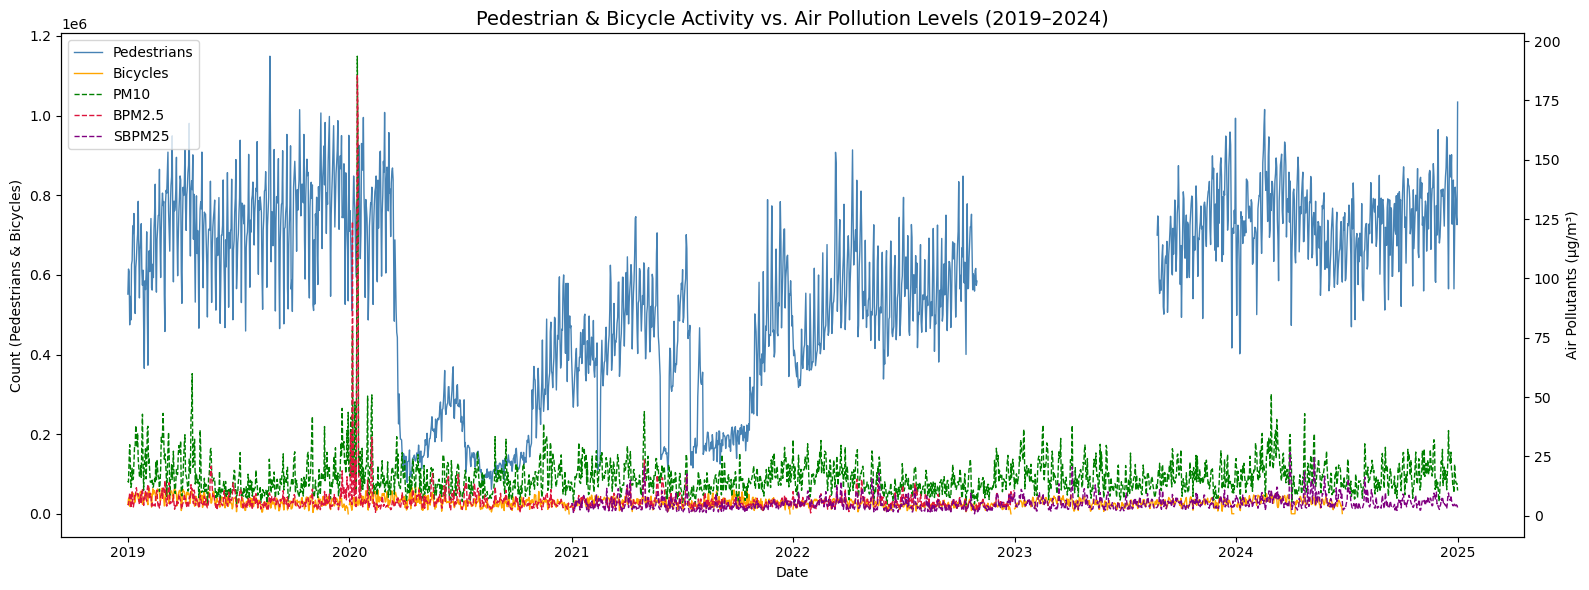

In [143]:
combined_df = combined_df.sort_index()

fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.plot(combined_df.index, combined_df['pedestrian'], label='Pedestrians', color='steelblue', linewidth=1)
ax1.plot(combined_df.index, combined_df['bicycle_count'], label='Bicycles', color='orange', linewidth=1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Count (Pedestrians & Bicycles)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(combined_df.index, combined_df['pm10'], label='PM10', color='green', linestyle='--', linewidth=1)
ax2.plot(combined_df.index, combined_df['bpm2.5'], label='BPM2.5', color='crimson', linestyle='--', linewidth=1)
ax2.plot(combined_df.index, combined_df['sbpm25'], label='SBPM25', color='purple', linestyle='--', linewidth=1)
ax2.set_ylabel('Air Pollutants (µg/m³)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Pedestrian & Bicycle Activity vs. Air Pollution Levels (2019–2024)', fontsize=14)
plt.tight_layout()
plt.show()

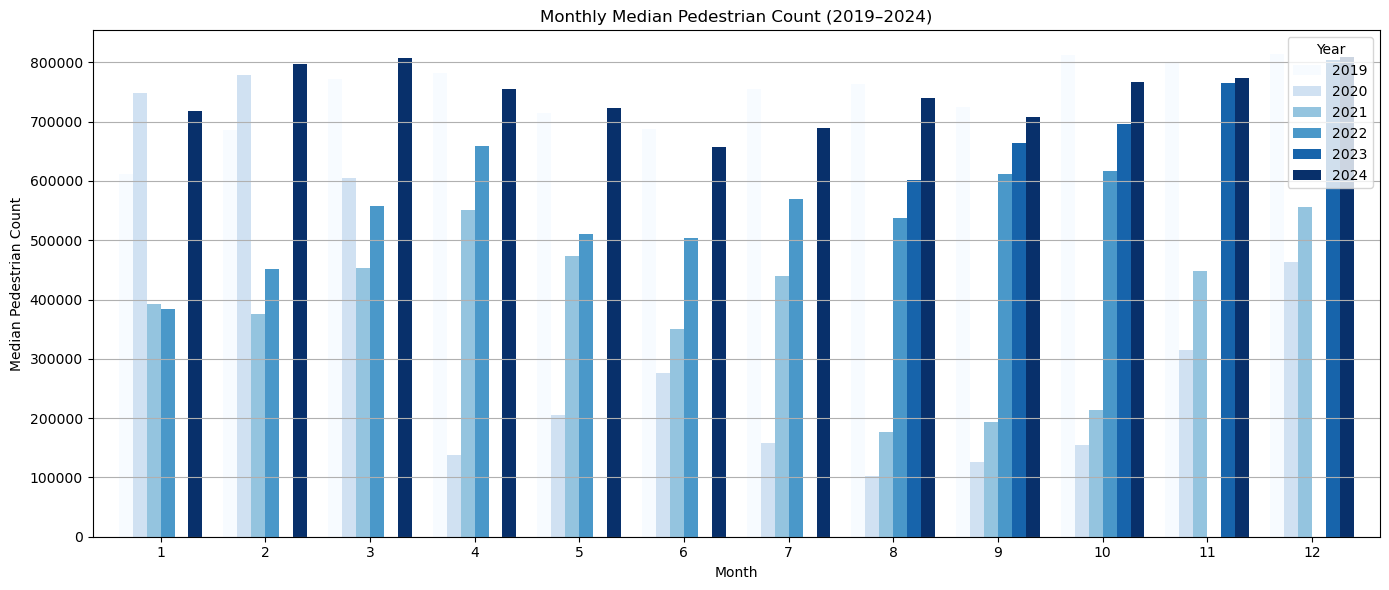

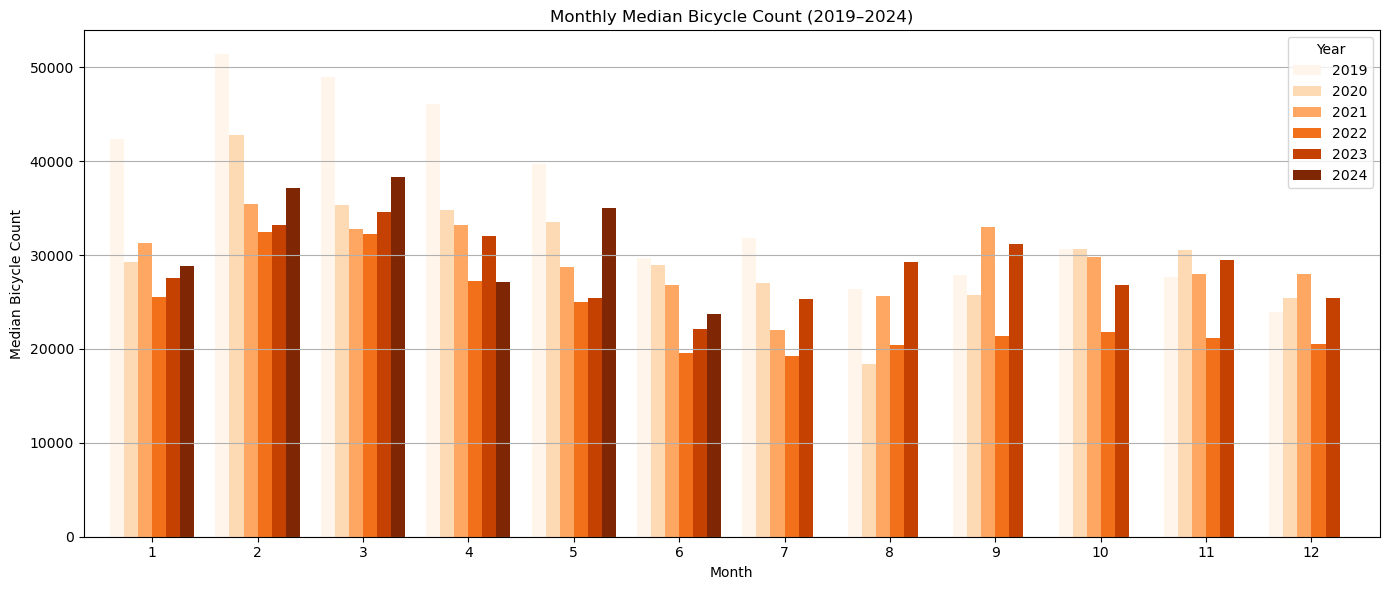

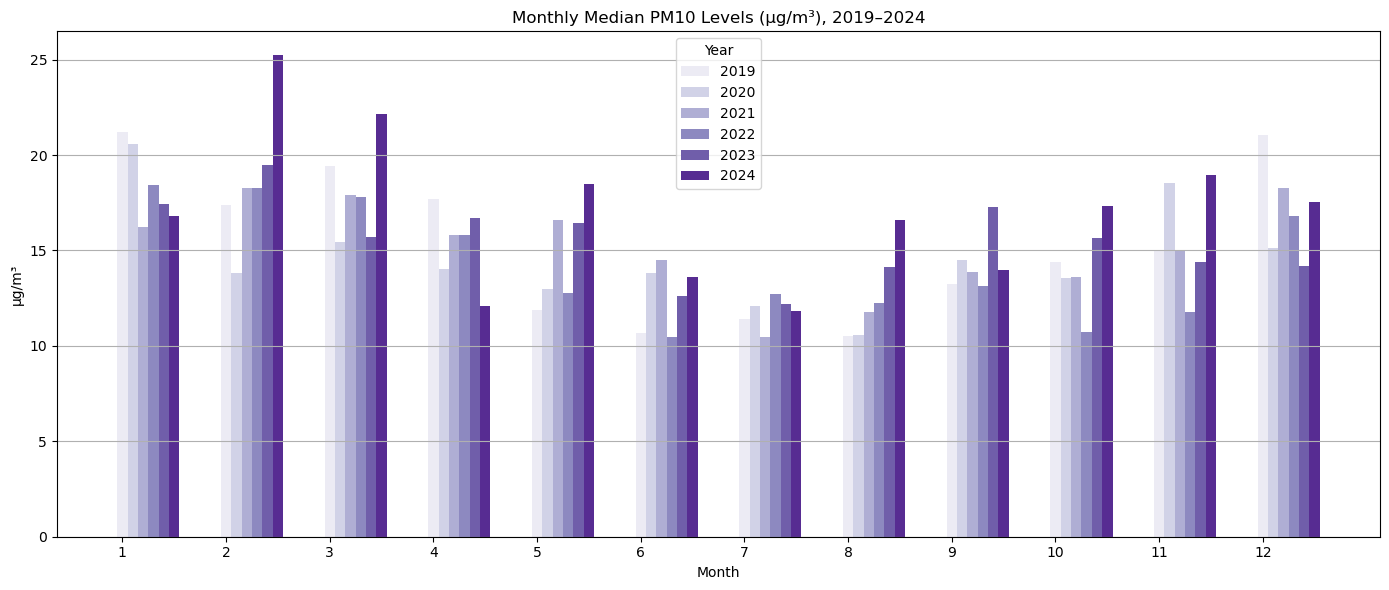

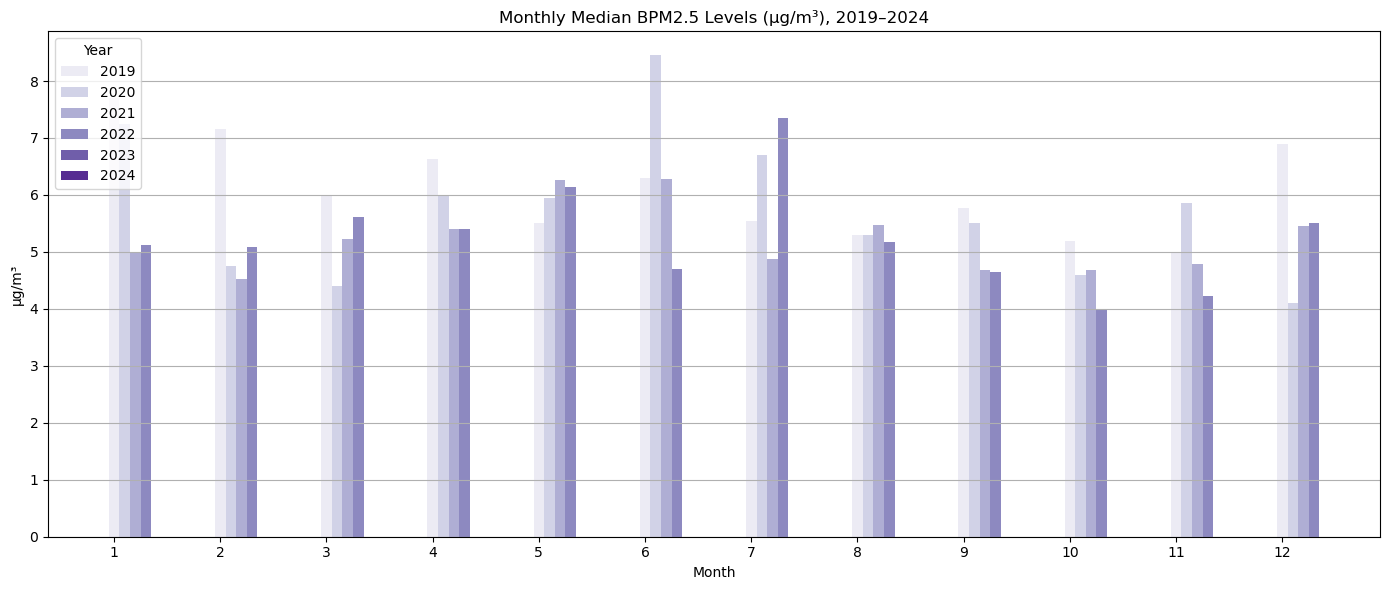

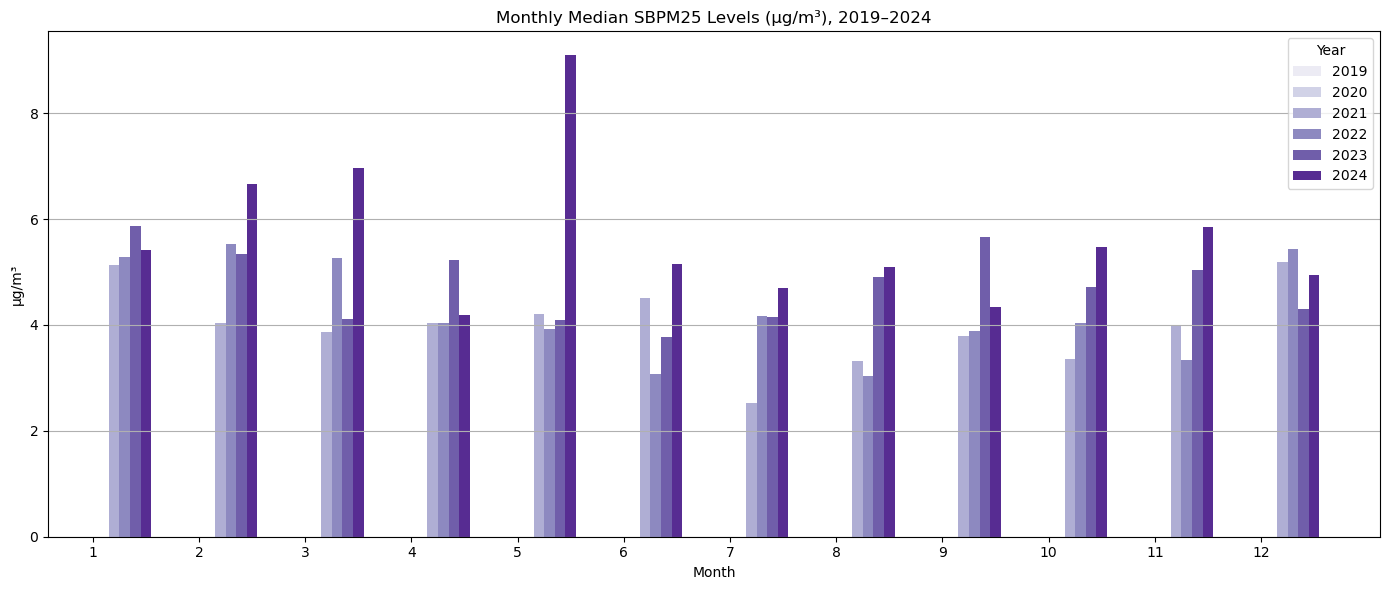

In [144]:
combined_df['year'] = combined_df.index.year
combined_df['month'] = combined_df.index.month

monthly_avg = combined_df.groupby(['year', 'month'])[
    ['pedestrian', 'bicycle_count', 'pm10', 'bpm2.5', 'sbpm25']
].median().reset_index()

fig, ax = plt.subplots(figsize=(14, 6))
pivot1 = monthly_avg.pivot(index='month', columns='year', values='pedestrian')
pivot1.plot(kind='bar', ax=ax, width=0.8, cmap='Blues', legend=True)
ax.set_title('Monthly Median Pedestrian Count (2019–2024)')
ax.set_xlabel('Month')
ax.set_ylabel('Median Pedestrian Count')
ax.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
pivot2 = monthly_avg.pivot(index='month', columns='year', values='bicycle_count')
pivot2.plot(kind='bar', ax=ax, width=0.8, cmap='Oranges', legend=True)
ax.set_title('Monthly Median Bicycle Count (2019–2024)')
ax.set_xlabel('Month')
ax.set_ylabel('Median Bicycle Count')
ax.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

years = sorted(monthly_avg['year'].unique()) 
palette = sns.color_palette("Purples", n_colors=len(years))  
year_color = dict(zip(years, palette)) 

pollutants = ['pm10', 'bpm2.5', 'sbpm25']

for pollutant in pollutants:
    plt.figure(figsize=(14, 6))
    for year in years:
        subset = monthly_avg[monthly_avg['year'] == year]
        plt.bar(
            subset['month'] + 0.1 * years.index(year), 
            subset[pollutant],
            width=0.1,
            label=year,
            color=year_color[year]
        )
    
    plt.title(f'Monthly Median {pollutant.upper()} Levels (µg/m³), 2019–2024')
    plt.xlabel('Month')
    plt.ylabel('µg/m³')
    plt.xticks(range(1, 13))
    plt.grid(axis='y')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

Correlation Matrix:
                pedestrian  bicycle_count  pm10  bpm2.5  sbpm25
pedestrian           1.00           0.21  0.16    0.08    0.24
bicycle_count        0.21           1.00  0.25    0.04    0.25
pm10                 0.16           0.25  1.00    0.80    0.74
bpm2.5               0.08           0.04  0.80    1.00    0.73
sbpm25               0.24           0.25  0.74    0.73    1.00


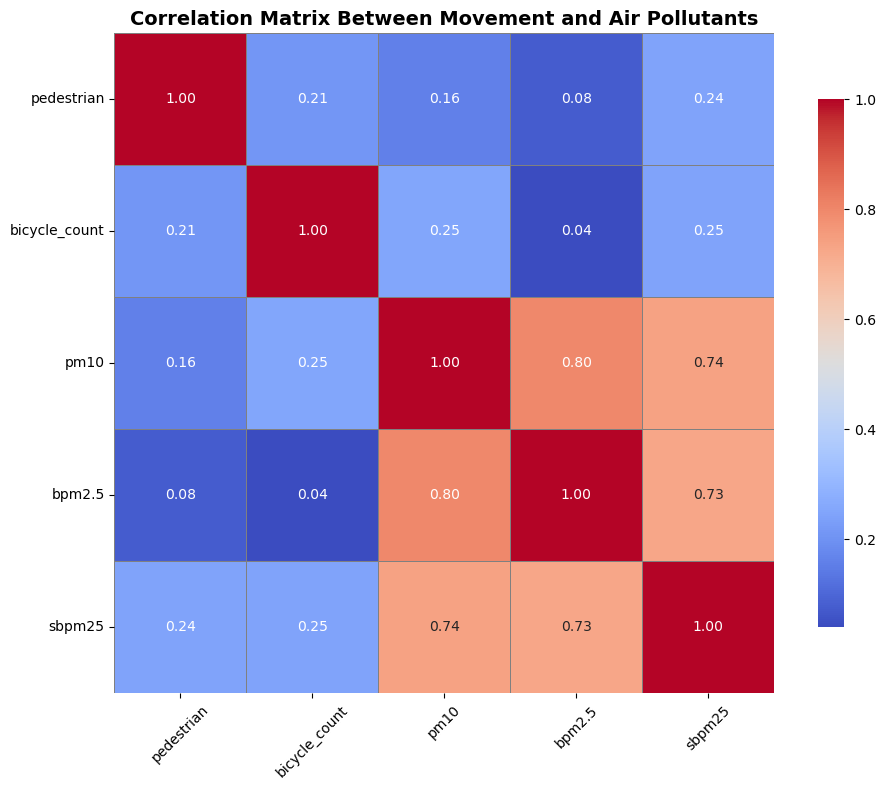

In [145]:
corr = combined_df[['pedestrian', 'bicycle_count', 'pm10', 'bpm2.5', 'sbpm25']].corr(method='pearson')

print("Correlation Matrix:\n", corr.round(2))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix Between Movement and Air Pollutants", fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()